In [81]:
import random
import numpy as np
import pandas as pd

In [82]:
x=[]
for i in range(0,1000):
     y = random.randrange(5000)
     x.append(y)


In [83]:
y=[]
for i in range(0, 1000):
     z = random.randrange(5000)
     y.append(z)


In [84]:
import pandas as pd
data = {
  "X": x,
  "Y": y
}

In [85]:
df = pd.DataFrame(data)
df

,X,Y
0,3855,806
1,3017,3313
2,56,3173
3,391,2250
4,4092,1482
...,...,...
995,124,4973
996,3844,4899
997,424,4834
998,3984,4056


In [86]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values


In [87]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [88]:
n = len(X)
numer = 0
denom = 0
for i in range(n):
    numer+=(X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)
print(m,c)

[0.02962422] [2417.86327899]


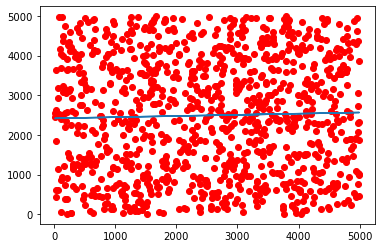

In [89]:
import matplotlib.pyplot as plt

y = c + m * X
plt.scatter(X,Y,c="red")
plt.plot(X, y)
plt.show()



In [90]:

mean_pred=np.mean(y)
mean_pred

2492.557

In [ ]:
# Performing Gradient Descent 
m = 0
c = 0

L = 0.1  # The learning Rate
epochs = 400  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X


for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    for i in range(len(X)):
            D_m = (-2/n) * X * (Y - Y_pred) # Derivative wrt m
            D_c = (-2/n) * (Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,
                                                random_state=666)

In [93]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [94]:
print('c:',reg.intercept_)
print('m',reg.coef_)


c: 2270.3511577724776
m [0.06956463]


In [95]:
y_pred = reg.predict(x_test)

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

print('mae:', mean_absolute_error(y_test,y_pred))
print('mse:', math.sqrt(mean_squared_error(y_test,y_pred)))

mae: 1300.0049641703745
mse: 1489.0293051174808


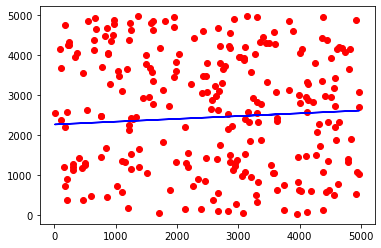

In [97]:
import matplotlib.pyplot as plt
plt.scatter(x_test,y_test, c='r')
plt.plot(x_test,y_pred, c='b')

In [98]:
sum(X * (Y - Y_pred))

TypeError: 'numpy.float64' object is not callable